# K-Means Clustering : Image Segmentation

### Import the necessary libraries

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

### Read the image file and convert it to NumPy Array

In [7]:
def ReadImage(img_file):
    img_arr = mpimg.imread(img_file)
    plt.imshow(img_arr)
    return(img_arr)

(720, 1280, 3)
(720, 1280)


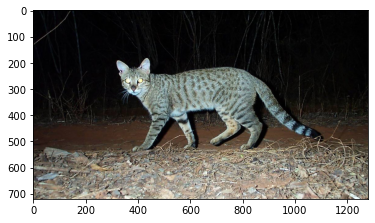

In [16]:
image_arr = ReadImage("C:/Users/Vibhooti Kishor/Downloads/All/Clustering-Project-master/Cat.jpg")
print(image_arr.shape)
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))
print(label_arr.shape)

###  Assigning random labels to individual pixels 

In [17]:
K = 4 ## K is the number of clusters that we want to create 

for i in range(label_arr.shape[0]):
    for j in range(label_arr.shape[1]):
        label_arr[i,j] = np.random.choice(K)
print(label_arr)

[[2. 3. 2. ... 1. 3. 0.]
 [3. 1. 0. ... 1. 1. 2.]
 [0. 3. 3. ... 1. 0. 1.]
 ...
 [3. 1. 0. ... 3. 1. 1.]
 [3. 2. 1. ... 0. 0. 2.]
 [3. 0. 0. ... 1. 2. 0.]]


### Define the $p^{th}$ order distance metric

The Minkowski distance of order $p$ (where $p$ is an integer) between two points

$X=(x_{1},x_{2},\ldots ,x_{n})$ and $Y=(y_{1},y_{2},\ldots ,y_{n})$ $\in \mathbb {R} ^{d}$ is defined as:

$$ D\left(X,Y\right)=\left(\sum _{i=1}^{d}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}} $$

In [18]:
def dist_p(vec1,vec2,p):  # Generalised Distance Formula
    L = len(vec1)
    s1 = 0
    for l in range(L):
        diff = np.abs(vec2[l]-vec1[l])
        s1 = s1 + diff**p
    distance = s1**(1/p)
    return(distance)

### Define function to generate the initial mean values from initial labels

In [19]:
def init_mean(K,img_arr,label_arr):
    mean_ls = [] ## List containing mean values of the clusters
    pixel_ls = [[] for k in range(K)] ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k:  ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K): 
        pixel_mat = np.matrix(pixel_ls[k])
        mean_k = np.mean(pixel_mat,axis=0)
        mean_ls.append(np.ravel(mean_k))
    return(mean_ls)    

### Update labels by comparing distances with previous mean values and generate new labels

In [20]:
def label_update(prev_mean,img_arr,label_arr,p):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            dist_ls = [] 
            for k in range(len(prev_mean)):
                dist = dist_p(img_arr[i,j,:],prev_mean[k],p) ## Calculate the distance of the pixel at [i,j] with the kth mean
                dist_ls.append(dist) ## Put the distance values in a list
            dist_arr = np.array(dist_ls) ## Convert it to a NumPy array
            new_label = np.argmin(dist_arr) ##The new_label of the point is the one which is closest to the pixel at [i,j]
            label_arr[i,j] = new_label ## Set the new label
    return(label_arr)

### Generate new mean values from the updated labels

In [21]:
def mean_from_label(K,prev_mean,img_arr,label_arr):
    pixel_ls = [[] for k in range(K)]  ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k: ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K):
        if len(pixel_ls[k]) != 0:  ## Only update the means of those clusters which has received at least one new point, else retain the old mean value
            pixel_mat = np.matrix(pixel_ls[k])
            mean_k = np.mean(pixel_mat,axis=0)
            prev_mean[k] = np.ravel(mean_k)
    new_mean = prev_mean
    return(new_mean)    

### Run the K-Means Algorithm to obtain the final labels and means

In [22]:
def KMeans(img_arr,label_arr,K,p,maxIter):
    mean_old = init_mean(K,img_arr,label_arr)
    for t in range(maxIter):
        new_label_arr = label_update(mean_old,img_arr,label_arr,p)
        mean_new = mean_from_label(K,mean_old,img_arr,new_label_arr)
        print("The mean obtained at {}th iteration is {}\n".format((t+1),mean_new))
        label_arr = new_label_arr ## Update the label array
        mean_old = mean_new ## Update the mean values
    return(mean_new,label_arr)

In [23]:
mean_new,label_arr = KMeans(image_arr,label_arr,K,2,3)

The mean obtained at 1th iteration is [array([16.79743443, 14.13350639, 12.56397781]), array([54.04458599, 66.61783439, 67.04458599]), array([57.41493457, 68.50808314, 70.86836028]), array([141.59761391, 139.46569565, 128.12658146])]

The mean obtained at 2th iteration is [array([10.60258151,  9.21541319,  8.81042678]), array([63.00568399, 50.8543849 , 40.49148819]), array([89.7703843 , 83.40240041, 72.38396015]), array([155.47466167, 154.69017477, 143.38835955])]

The mean obtained at 3th iteration is [array([8.1737034 , 7.45845252, 7.48311849]), array([58.70395326, 46.66568231, 37.2831648 ]), array([99.38077275, 95.12275007, 84.22462618]), array([162.30709816, 161.79539901, 150.45518009])]



### Use the finally obtained mean and labels to segment the image

In [24]:
def segmentImage(image_arr,label_arr,mean_ls):
    seg_image = np.zeros((image_arr.shape[0],image_arr.shape[1],image_arr.shape[2]))
    for i in range(seg_image.shape[0]):
        for j in range(seg_image.shape[1]):
            k = label_arr[i,j]
            seg_image[i,j,:] = mean_ls[int(k)]
    seg_image = seg_image.astype(np.uint8)
    plt.imshow(seg_image)

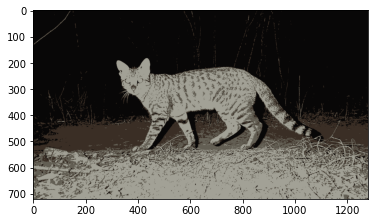

In [25]:
segmentImage(image_arr,label_arr,mean_new)

# Using Sklearn's K-Means for Image Compression

In [26]:
from sklearn.cluster import KMeans

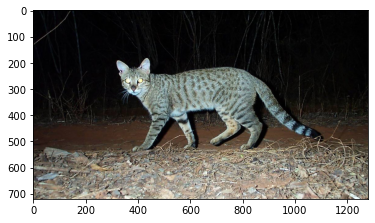

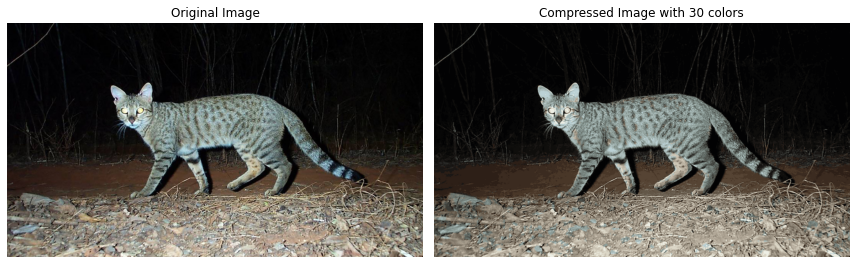

In [29]:
# Read the image
img = ReadImage('Cat.jpg')
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run the Kmeans algorithm
km = KMeans(n_clusters=30)
km.fit(X)

# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 611 * 958 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();